In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\CVR\\Desktop\\6635\\GlobalLandTemperaturesByCity.csv")
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


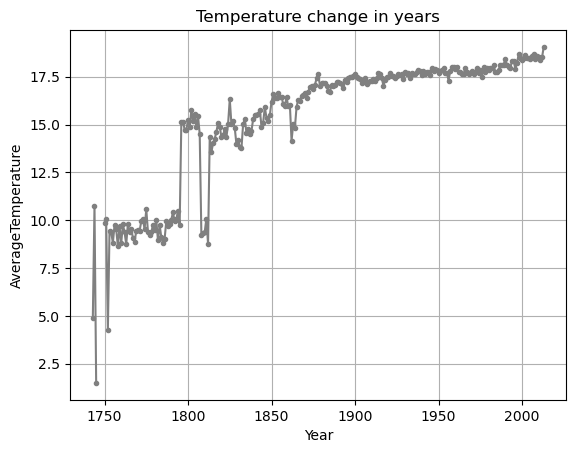

In [13]:
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
y=df.groupby('Year')['AverageTemperature'].mean()
plt.plot(y.index,y.values,linewidth=1.5,color='grey',marker='.')
plt.xlabel("Year")
plt.ylabel("AverageTemperature")
plt.title("Temperature change in years")
plt.grid(True)
plt.show()

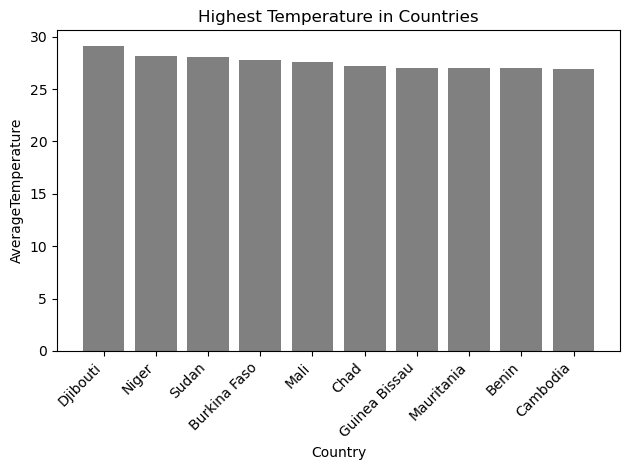

In [36]:
x=df['Country']
y=df.groupby('Country')['AverageTemperature'].mean()
y= y.sort_values(ascending=False).head(10)
plt.bar(y.index,y.values,linewidth=1.5,color='grey')
plt.xlabel("Country")
plt.ylabel("AverageTemperature")
plt.title("Highest Temperature in Countries")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

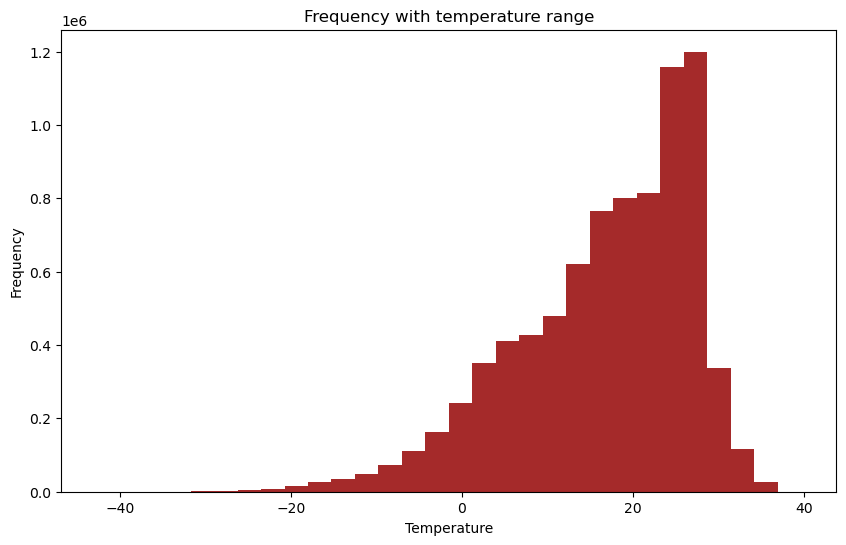

In [42]:
x=df['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(x,bins=30,color='brown')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Frequency with temperature range")
plt.show()

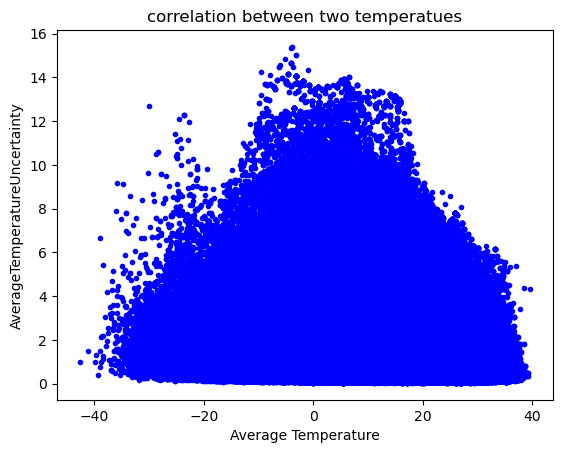

In [45]:
x=df['AverageTemperature'].dropna()
y=df['AverageTemperatureUncertainty'].dropna()
plt.scatter(x,y,color='blue',marker='.')
plt.xlabel("Average Temperature")
plt.ylabel("AverageTemperatureUncertainty")
plt.title("correlation between two temperatues")
plt.show()

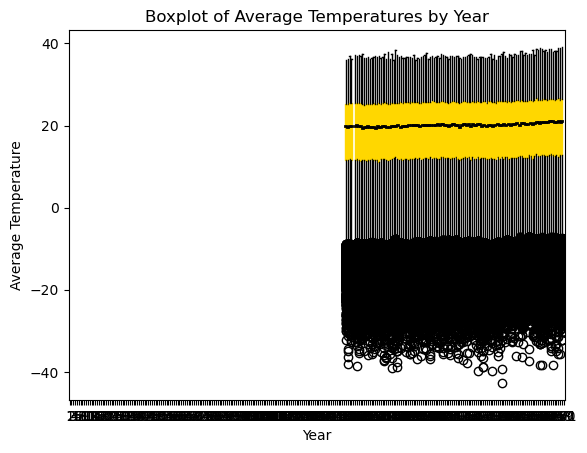

In [47]:
df['dt'] = pd.to_datetime(df['dt'])
df['year'] = df['dt'].dt.year            
grouped_data = df.groupby('year')['AverageTemperature'].apply(list)
plt.boxplot(grouped_data, patch_artist=True, 
            boxprops=dict(facecolor='chartreuse', color='gold'),
            medianprops=dict(color='black', linewidth=2))
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Boxplot of Average Temperatures by Year')
plt.show()


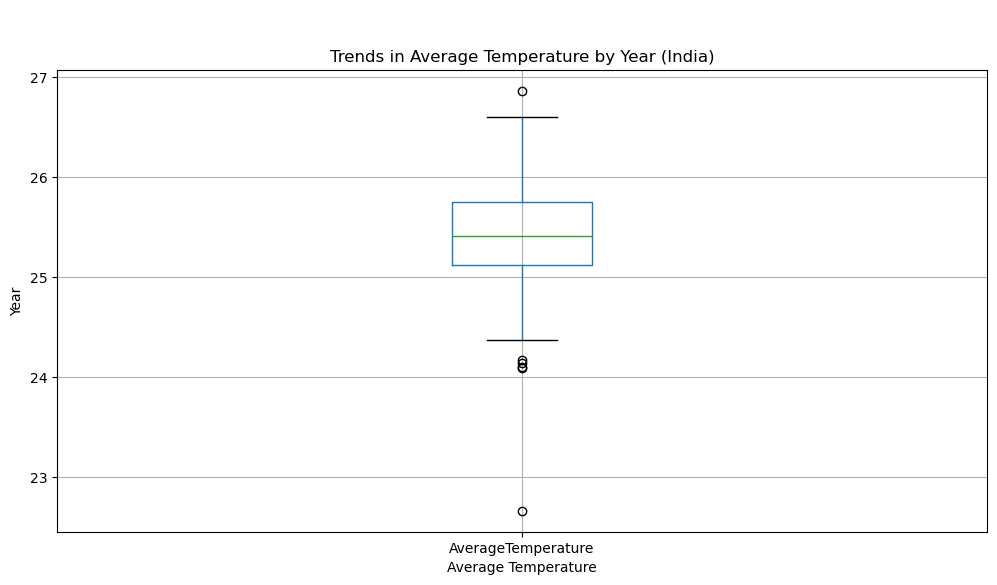

In [76]:
df_india = df[df['Country'] == 'India'].copy()
df_india['dt'] = pd.to_datetime(df_india['dt'], errors='coerce')
df_india['Year'] = df_india['dt'].dt.year
annual_avg_temp_india = df_india.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
annual_avg_temp_india.boxplot(column='AverageTemperature') #, by='Year', vert=False
plt.xlabel("Average Temperature")
plt.ylabel("Year")
plt.title("Trends in Average Temperature by Year (India)")
plt.suptitle('   ')
plt.show()


In [48]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


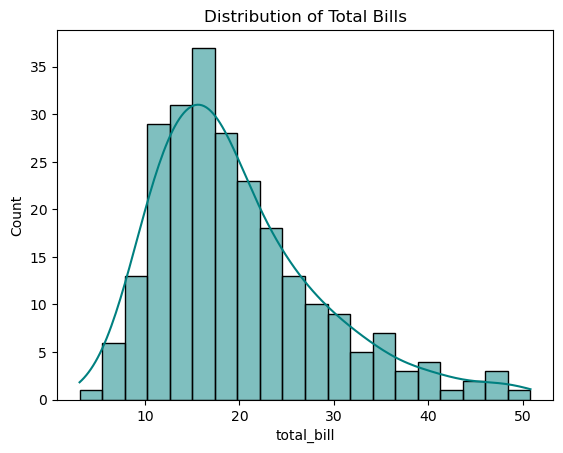

In [57]:
sns.histplot(data=tips,x="total_bill",kde=True,bins=20,color="teal")
plt.title("Distribution of Total Bills")
plt.show()

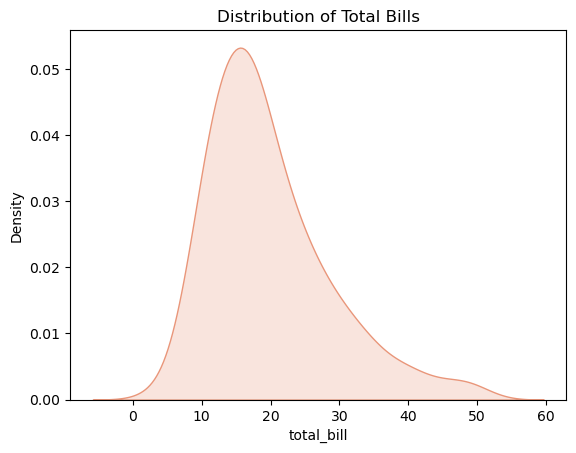

In [61]:
sns.kdeplot(data=tips,x="total_bill",fill=True,color="darksalmon")
plt.title("Distribution of Total Bills")
plt.show()

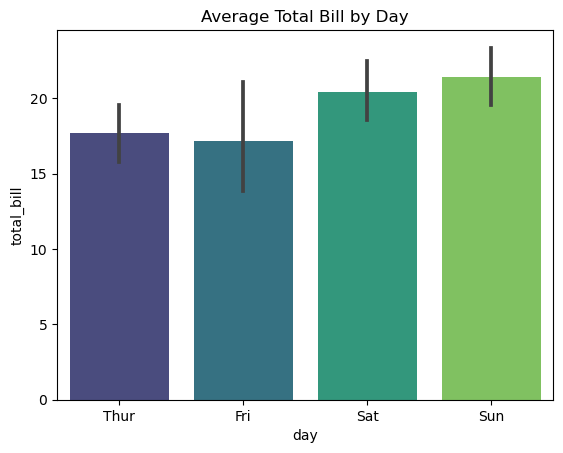

In [62]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")
plt.title("Average Total Bill by Day")
plt.show()

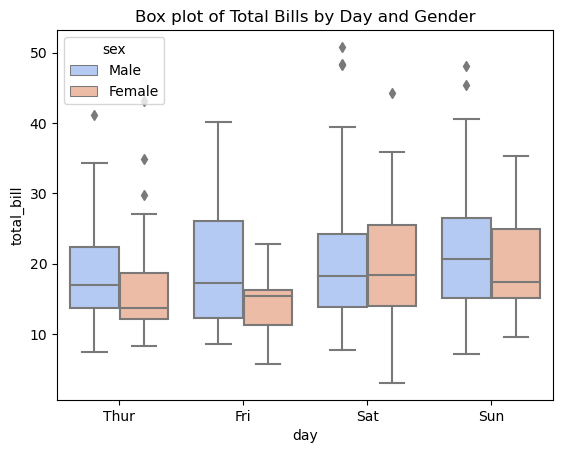

In [65]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")
plt.title("Box plot of Total Bills by Day and Gender")
plt.show()

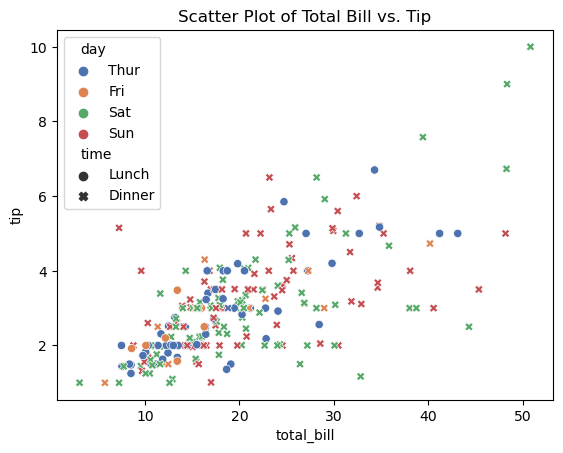

In [66]:
sns.scatterplot(data=tips,y="tip",x="total_bill",hue="day",palette="deep",style="time")
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

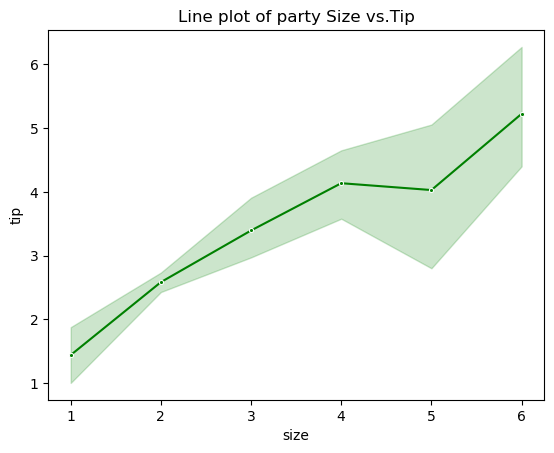

In [68]:
sns.lineplot(data=tips,x="size",y="tip",marker=".",color="green")
plt.title("Line plot of party Size vs.Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


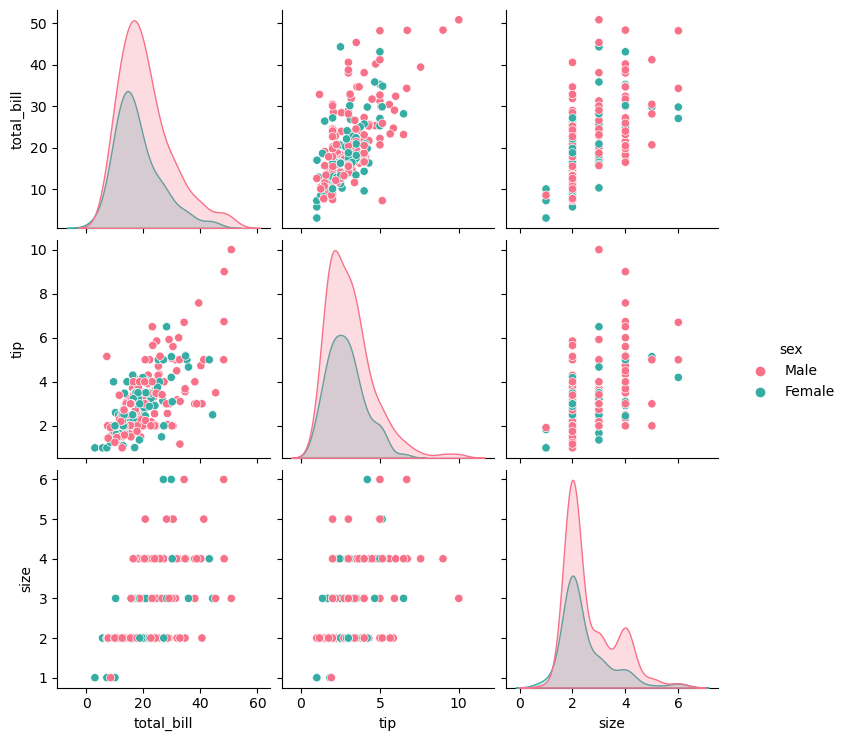

In [69]:
sns.pairplot(data=tips,hue="sex",palette="husl")
plt.show()

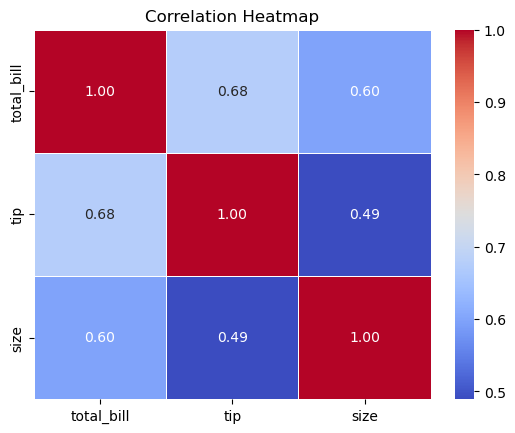

In [75]:
numeric_tips = tips.select_dtypes(include=['number'])
correlation_matrix = numeric_tips.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()